<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 3.B - Programación Dinámica </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
A la hora de crear las matrices de programación dinámica podéis emplear diversas estructuras de datos. La lista de listas puede ser una buena opción, pero existen librerías como NumPy que hacen una mejor gestión de las matrices.

Podéis consultar aquí la documentación: https://docs.scipy.org/doc/numpy/reference/

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>3 - Distancia de edición</p></h2>
  
  <p> Dadas dos cadenas S1 y S2, este algoritmo trata de encontrar la "distancia" entre ellas. Basamos la distancia en el número de transformaciones necesarias para convertir la cadena S1 en la cadena S2 (o viceversa). Se consideran tres transformaciones distintas: inserción, eliminación y sustitución. Los costes de cada operación serán parámetros de la función.</p>
  
  <img src='img/min_Edit_Distance_DP_Table.png' width="50%">
  
Además, se os pide que reconstruyáis el conjunto de operaciones que realizar sobre la primera palabra (<i>relevant</i>) para convertirla en la segunda (<i>elephant</i>). En el ejemplo de la imagen (donde los costes de las operaciones es 1 para todas):
<ul>
    <li> Eliminar 'R' en la posición 0.           $('D','R',0)$</li>
    <li> Insertar 'P' en la posición 4.           $('I','P',4)$</li>
    <li> Substituir 'V' por 'H' en la posición 5.            $('R',('V', 'H'),4)$ </li>
    <li> ........ El coste total de edición es: 3 </li>
</ul>

** Nota: Vuestro algoritmo podría encontrar otro conjunto de operaciones distinto a este pero con el mismo coste de edición.

In [1]:
import numpy as np

In [2]:
def wagner_fischer(s, t):
    """
    Compute the edition matrix of two
    given strings using the Wagner-Fischer
    dynamic programming algorithm.
    
    Parameters
    ----------
        s, str
        t, str
    
    Returns
    -------
        np.array
            Two dimensional np.ndarray
            with the edition values
    """
        
    # Init the edit distance matrix
    
    m, n = len(s) + 1, len(t) + 1
    d = np.zeros((m, n), dtype=np.int)

    for i in range(1, m):
        d[i][0] = i

    for j in range(1, n):
        d[0][j] = j

    # Compute the matrix using the
    # Wagner–Fischer algorithm
        
    for j in range(1, n):
        for i in range(1, m):
            sub_cost = 0 if s[i-1] == t[j-1] else 1
            d[i][j] = min(d[i-1, j] + 1, d[i, j-1] + 1, d[i-1, j-1] + sub_cost)

    return d

def distancia_edicion(s1, s2):
    """
    Compute the minimum number of changes
    to make s2 into s1, using the 
    Wagner-Fischer algorithm to compute the
    edition distance matrix between s1 and s2.
    
    Parameters
    ----------
        s1, str
        s2, str
    
    Returns
    -------
        tuple (int, list)
            Minimum number of operations and
            the list of changes to make
    """
    
    m, n = len(s1), len(s2)
    changes, x, y = [], m, n
    
    # Compute the edition distance matrix
    
    d = wagner_fischer(s1, s2)
    
    # Compute the changes to make
    
    while x >= 0 and y >= 0:
        if x == 0:
            a, b, c = x, y - 1, "I"
            
            if d[a][b] != d[x][y] and y > 0:
                changes.append((c, s2[b], a))
                
        elif y == 0:
            a, b, c = x - 1, y, "D"
            
            if d[a][b] != d [x][y] and x > 0:
                changes.append((c, s2[b], a))
                
        else:
            a, b, c = x - 1, y - 1, "R"
            
            if d[a][b] > d[x - 1][y]:
                a, b, c = x - 1, y, "D"
            
            if d[a][b] > d[x][y - 1]:
                a, b, c = x, y - 1, "I"

            if d[a][b] != d [x][y] and (x > 0 and y > 0):
                if c == "R":
                    changes.append((c, (s1[a], s2[b]), a))
                
                else:
                    changes.append((c, s2[y], a))

        x, y, z = a, b, c
    
    return d[m][n], changes

In [3]:
arr = [('relevant','elephant'), ('surgery', 'survey'), ('abcde', 'vwxyz')]

for s, t in arr:
    m, c =  distancia_edicion(s, t)
    
    print(f"To change '{s}' to '{t}' ({m} changes):\n\t{c}\n")

To change 'relevant' to 'elephant' (3 changes):
	[('R', ('v', 'h'), 4), ('I', 'h', 4), ('D', 'e', 0)]

To change 'surgery' to 'survey' (2 changes):
	[('D', 'y', 5), ('R', ('g', 'v'), 3)]

To change 'abcde' to 'vwxyz' (5 changes):
	[('R', ('e', 'z'), 4), ('R', ('d', 'y'), 3), ('R', ('c', 'x'), 2), ('R', ('b', 'w'), 1), ('R', ('a', 'v'), 0)]



<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Cuestiones</h3></p> </center> </div>

### Analiza la complejidad del algoritmo

He implementat l'algoritme de Wagner-Fischer [1] per a computar la matriu d'edicions.

La complexitat es $O(nm)$, on $n$ i $m$ denoten les llargades dels strings.

#### Ref.

[1] [Wikipedia: Wagner-Fischer](https://en.wikipedia.org/wiki/Wagner%E2%80%93Fischer_algorithm)

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>4 - Torres de Hanoi</p></h2>
  
  <p>Se plantea un escenario con 3 torres y una serie de discos de diferentes tamaños. Buscamos mover todos los discos de una torre origen a otra destino empleando la torre intermedia como soporte. Siempre deberán cumplirse las siguientes condiciones:
<ul>
    <li> Solo podemos mover un disco a cada vez. </li>
    <li> Un movimiento de disco consiste en coger el disco superior de una de las torres y colocarlo en la cima de otra de las torres. </li>
    <li> Un disco nunca podrá estar sobre otro disco de menor tamaño. </li>
</ul>

Podéis ver aquí un ejemplo animado de Hanoi con 4 discos en la que queremos mover todos los discos desde la torre izquierda a la derecha.
<center><img src="img/hanoi.gif"></center>

Para más ejemplos y experimentación, tenéis disponible el juego online: https://www.mathsisfun.com/games/towerofhanoi.html
    
Se os pide que implementéis la solución de Programación Dinámica al problema de las torres de Hanoi para calcular el número mínimo de movimientos necesarios para mover $D$ discos de la torre $t_o$ a la torre $t_d$.

Además, se os pide que devolváis una lista de tuplas con la forma $(t_i,t_j)$ que simboliza mover el disco que se encuentra más arriba de la torre $i$ a la cima de la torre $j$.
Por ejemplo, para 3 discos, los movimientos serían:
[(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]
</p>
  

In [4]:
from collections import defaultdict
from itertools import permutations

def dynamic_hanoi(d, t0=0, t1=2, t_aux=1, dp=defaultdict(lambda : defaultdict(lambda: []))):
    """
    Dynamic programming algorithm to solve 
    the Hanoi towers problem.
    
    Parameters
    ----------
        d, int
            Number of discs
    
    Returns
    -------
        list
            Movements to solve the towers
    """
    
    # Base cases
    
    if d <= 0:
        return []
    
    if d == 1:
        return [(t0, t1)]

    # Compute the permutations of three elements
    # and get the index of the actual one in that list 
    
    perm = list(permutations((0, 1, 2)))
    i = perm.index((t0, t1, t_aux))
    
    # If the current permutation is not memorized
    # compute it and save it in dp
    # if not, directly return
    
    if len(dp[d-2][i]) == 0:
        dp[d-2][i] += dynamic_hanoi(d-1, t0, t_aux, t1, dp) + [(t0, t1)] + dynamic_hanoi(d-1, t_aux, t1, t0, dp)
    
    return dp[d-2][i]

Ran 26 test: OK.
Elapsed: 4.51795387 s.


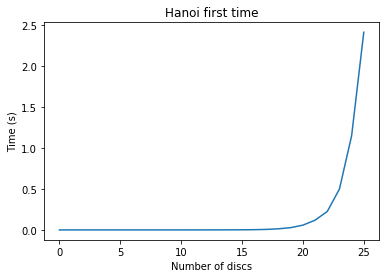

In [5]:
% matplotlib inline

from time import time
from copy import copy
import matplotlib.pyplot as plt

# Testing

max_it, t_arr = 25, []

for d in range(0, max_it + 1):
    t = time()
    d_h = dynamic_hanoi(d)
    t = time() - t
    t_arr.append(t)
    
    assert len(d_h) == 2**d - 1

print(f"Ran {max_it + 1} test: OK.")

# Banchmarks and plotting

print(f"Elapsed: {sum(t_arr):4.8f} s.")

plt.plot(list(range(0, max_it + 1)), t_arr)

plt.xlabel("Number of discs")
plt.ylabel("Time (s)")
plt.title("Hanoi first time")

plt.show()

### Nota

Si es reinicia el kernel i s'executa tot el notebook seguit, en el codi següent es podrà apreciar la utilitat de la memorització amb `dp`.

Elapsed: 0.00005984 s.


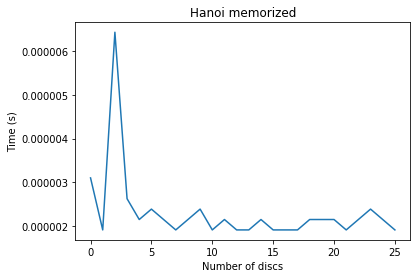

In [6]:
t_arr = []

for d in range(0, max_it + 1):
    t = time()
    d_h = dynamic_hanoi(d)
    t = time() - t
    t_arr.append(t)

print(f"Elapsed: {sum(t_arr):4.8f} s.")

plt.plot(list(range(0, max_it + 1)), t_arr)

plt.xlabel("Number of discs")
plt.ylabel("Time (s)")
plt.title("Hanoi memorized")

plt.show()

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Cuestiones</h3></p> </center> </div>

### Analiza la complejidad del algoritmo

Resoldre el problema de les torres de Hanoi té una complexitat de $O(2^n-1)$, on $n$ denota el nombre de discs. 

La implementació actual, però, té una complexitat molt menor.
Degut a que les permutacions de tres elements són 6 i que s'utilitza la memorització d'operacions anteriors (la variable `dp`), es té que la complexitat es redueix a $O(n)$.